In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # LogisticRegression Model from sklearn
from sklearn.metrics import classification_report, confusion_matrix,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sample1 = pd.DataFrame({ 'A': [14 , 6,float('nan'),9,float('nan')]  ,
                        'B': [float('nan') , 6,float('nan'),9,float('nan')]
                        
                         })
sample1

,A,B
0,14.0,NaN
1,6.0,6.0
2,NaN,NaN
3,9.0,9.0
4,NaN,NaN


In [3]:
sample1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      float64
 1   B       2 non-null      float64
dtypes: float64(2)
memory usage: 212.0 bytes


In [4]:
sample1.ffill(inplace= True)
sample1

,A,B
0,14.0,NaN
1,6.0,6.0
2,6.0,6.0
3,9.0,9.0
4,9.0,9.0


In [5]:
sample1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       5 non-null      float64
 1   B       4 non-null      float64
dtypes: float64(2)
memory usage: 212.0 bytes


In [6]:
fraud_txn_df = pd.read_csv("fraud_txn.csv")
fraud_txn_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-12-16 12:40:56,377113842678100,"fraud_O'Connell, Botsford and Hand",home,32.65,Billy,Gallagher,M,673 Delgado Burg,...,39.4055,-75.3209,804,Insurance risk surveyor,1965-03-25,ecf3cff893d47eeec287958f2dcbe9f8,1355661656,38.988831,-75.442420,0
1,1,2019-11-10 21:29:24,502038091380,"fraud_Haley, Jewess and Bechtelar",shopping_pos,819.52,Kurt,Peters,M,7290 Ashlee Keys,...,36.6704,-93.0377,1201,"Engineer, agricultural",1980-03-18,46f3f81e3f27d015db2d80f16a663b3d,1352582964,37.502359,-92.941619,1
2,2,2019-12-31 22:11:08,30181367542315,"fraud_Tillman, Fritsch and Schmitt",misc_net,808.97,Danielle,Walker,F,9824 Mitchell Run,...,44.2415,-121.0113,2016,Local government officer,1953-12-25,cf6151929f0b38c9db2181b27423cd34,1356991868,44.931750,-121.287451,1
3,3,2020-04-09 17:23:25,376445266762684,"fraud_Mueller, Gerhold and Mueller",health_fitness,64.85,Rachel,Lowe,F,372 Jeffrey Course,...,41.1558,-101.1360,1789,Insurance broker,1982-02-11,5124d4971ec41f68634646067f63cd16,1365528205,41.084349,-100.922198,0
4,4,2019-12-22 15:03:23,3500969075198072,fraud_Frami Group,entertainment,63.20,Kenneth,Sanchez,M,0110 Ashley Forest,...,47.2271,-117.0819,895,Clothing/textile technologist,1999-05-31,c8b812894d9b9ca7feeff9c83facaec1,1356188603,46.411414,-116.657814,0


In [7]:
#Drop unnecessary columns. Demographic columns is not needed.
fraud_txn_df.drop(columns=['Unnamed: 0','trans_date_trans_time', 'first', 'last', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
                  , inplace=True) # Update the same dataframe - inplace=True
fraud_txn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15506 entries, 0 to 15505
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      15506 non-null  int64  
 1   merchant    15506 non-null  object 
 2   category    15506 non-null  object 
 3   amt         15506 non-null  float64
 4   gender      15506 non-null  object 
 5   zip         15506 non-null  int64  
 6   lat         15506 non-null  float64
 7   long        15506 non-null  float64
 8   city_pop    15506 non-null  int64  
 9   unix_time   15506 non-null  int64  
 10  merch_lat   15506 non-null  float64
 11  merch_long  15506 non-null  float64
 12  is_fraud    15506 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 1.5+ MB


In [8]:
import pandas as pd
import numpy as np
# If you prefer miles, set r = 3958.8
def haversine_np(lat1, lon1, lat2, lon2, r=6371.0):
    # convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return r * c

# Example DataFrame
df = pd.DataFrame({
    'lat': [58.988831],
    'long': [-15.44242],
    'merch_lat': [38.988831],
    'merch_long': [-75.44242]
})

df['transaction_distance'] = haversine_np(
    df['lat'], df['long'], df['merch_lat'], df['merch_long']
)

print(df)

         lat      long  merch_lat  merch_long  transaction_distance
0  58.988831 -15.44242  38.988831   -75.44242           4705.105969


In [9]:
fraud_txn_df['is_fraud']

0        0
1        1
2        1
3        0
4        0
        ..
15501    1
15502    0
15503    1
15504    1
15505    1
Name: is_fraud, Length: 15506, dtype: int64

In [10]:
# Fraud trends over time
# Ensure datetime parsing
fraud_txn_df = pd.read_csv("fraud_txn.csv")

fraud_txn_df['trans_date_trans_time'] = pd.to_datetime(fraud_txn_df['trans_date_trans_time'], errors='coerce')
print("Fraud data shape : ",fraud_txn_df['trans_date_trans_time'].shape)

# Drop rows with invalid timestamps or fraud flag
fraud_txn_time_dat_df = fraud_txn_df.dropna(subset=['trans_date_trans_time', 'is_fraud'])

# Set time-based index for easy resampling
fraud_txn_time_dat_df = fraud_txn_time_dat_df.set_index('trans_date_trans_time')

print("Fraud data shape after indexing : ",fraud_txn_df['trans_date_trans_time'].shape)

Fraud data shape :  (15506,)
Fraud data shape after indexing :  (15506,)


In [11]:
fraud_txn_time_dat_df.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
trans_date_trans_time,,,,,,,,,,,,,,,,,,,,,
2019-12-16 12:40:56,0,377113842678100,"fraud_O'Connell, Botsford and Hand",home,32.65,Billy,Gallagher,M,673 Delgado Burg,Greenwich,...,39.4055,-75.3209,804,Insurance risk surveyor,1965-03-25,ecf3cff893d47eeec287958f2dcbe9f8,1355661656,38.988831,-75.442420,0
2019-11-10 21:29:24,1,502038091380,"fraud_Haley, Jewess and Bechtelar",shopping_pos,819.52,Kurt,Peters,M,7290 Ashlee Keys,Kissee Mills,...,36.6704,-93.0377,1201,"Engineer, agricultural",1980-03-18,46f3f81e3f27d015db2d80f16a663b3d,1352582964,37.502359,-92.941619,1
2019-12-31 22:11:08,2,30181367542315,"fraud_Tillman, Fritsch and Schmitt",misc_net,808.97,Danielle,Walker,F,9824 Mitchell Run,Powell Butte,...,44.2415,-121.0113,2016,Local government officer,1953-12-25,cf6151929f0b38c9db2181b27423cd34,1356991868,44.931750,-121.287451,1
2020-04-09 17:23:25,3,376445266762684,"fraud_Mueller, Gerhold and Mueller",health_fitness,64.85,Rachel,Lowe,F,372 Jeffrey Course,Sutherland,...,41.1558,-101.1360,1789,Insurance broker,1982-02-11,5124d4971ec41f68634646067f63cd16,1365528205,41.084349,-100.922198,0
2019-12-22 15:03:23,4,3500969075198072,fraud_Frami Group,entertainment,63.20,Kenneth,Sanchez,M,0110 Ashley Forest,Tekoa,...,47.2271,-117.0819,895,Clothing/textile technologist,1999-05-31,c8b812894d9b9ca7feeff9c83facaec1,1356188603,46.411414,-116.657814,0


In [12]:
daily = fraud_txn_time_dat_df.groupby(pd.Grouper(freq='D'))['is_fraud'].agg(['sum', 'count'])
daily.head()

,sum,count
trans_date_trans_time,,
2019-01-01,0,14
2019-01-02,7,8
2019-01-03,12,23
2019-01-04,13,22
2019-01-05,13,21


In [13]:
daily.rename(columns={'sum': 'fraud_count', 'count': 'total_count'}, inplace=True)
# rate of fraud count i.e. (sum of fraud count per time instance of day) / (total transactions per the same time instance of day)
daily['fraud_rate'] = daily['fraud_count'] / daily['total_count']

print(daily.head())
print(daily.count)

                       fraud_count  total_count  fraud_rate
trans_date_trans_time                                      
2019-01-01                       0           14    0.000000
2019-01-02                       7            8    0.875000
2019-01-03                      12           23    0.521739
2019-01-04                      13           22    0.590909
2019-01-05                      13           21    0.619048
<bound method DataFrame.count of                        fraud_count  total_count  fraud_rate
trans_date_trans_time                                      
2019-01-01                       0           14    0.000000
2019-01-02                       7            8    0.875000
2019-01-03                      12           23    0.521739
2019-01-04                      13           22    0.590909
2019-01-05                      13           21    0.619048
...                            ...          ...         ...
2020-06-17                      35           44    0.795455
2020-06

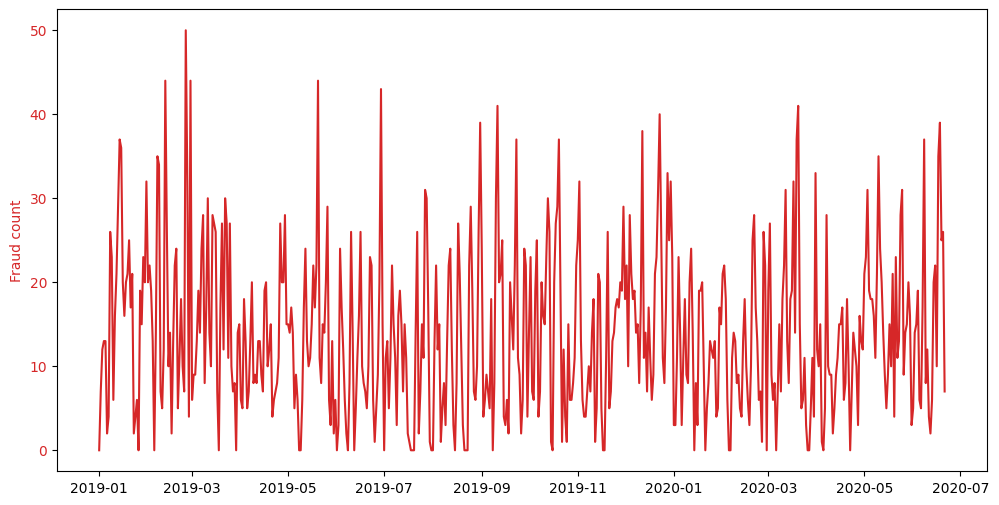

In [14]:
# Plot fraud count and rate over time
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(daily.index, daily['fraud_count'], color='tab:red', label='Fraud count (daily)')
ax1.set_ylabel('Fraud count', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

In [15]:
fraud_txn_df_sample100 = pd.read_csv("fraud_txn_100_Recrds.csv")

fraud_txn_df_sample100.head()
target = 'is_fraud'
y = fraud_txn_df_sample100[target]
y

0      0
1      1
2      1
3      0
4      0
      ..
96     1
97     0
98     1
99     1
100    1
Name: is_fraud, Length: 101, dtype: int64

In [16]:
X = fraud_txn_df_sample100.drop(columns=[target])
X.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,0,2019-12-16 12:40:56,377113842678100,"fraud_O'Connell, Botsford and Hand",home,32.65,Billy,Gallagher,M,673 Delgado Burg,...,8323,39.4055,-75.3209,804,Insurance risk surveyor,1965-03-25,ecf3cff893d47eeec287958f2dcbe9f8,1355661656,38.988831,-75.442420
1,1,2019-11-10 21:29:24,502038091380,"fraud_Haley, Jewess and Bechtelar",shopping_pos,819.52,Kurt,Peters,M,7290 Ashlee Keys,...,65680,36.6704,-93.0377,1201,"Engineer, agricultural",1980-03-18,46f3f81e3f27d015db2d80f16a663b3d,1352582964,37.502359,-92.941619
2,2,2019-12-31 22:11:08,30181367542315,"fraud_Tillman, Fritsch and Schmitt",misc_net,808.97,Danielle,Walker,F,9824 Mitchell Run,...,97753,44.2415,-121.0113,2016,Local government officer,1953-12-25,cf6151929f0b38c9db2181b27423cd34,1356991868,44.931750,-121.287451
3,3,2020-04-09 17:23:25,376445266762684,"fraud_Mueller, Gerhold and Mueller",health_fitness,64.85,Rachel,Lowe,F,372 Jeffrey Course,...,69165,41.1558,-101.1360,1789,Insurance broker,1982-02-11,5124d4971ec41f68634646067f63cd16,1365528205,41.084349,-100.922198
4,4,2019-12-22 15:03:23,3500969075198072,fraud_Frami Group,entertainment,63.20,Kenneth,Sanchez,M,0110 Ashley Forest,...,99033,47.2271,-117.0819,895,Clothing/textile technologist,1999-05-31,c8b812894d9b9ca7feeff9c83facaec1,1356188603,46.411414,-116.657814


In [17]:
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [18]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_encoded.head()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,trans_num_e64d10abd181e77b11eb8f7043084e17,trans_num_e86b894dc29ea4f9a0acab7b778f4461,trans_num_ebd48a884f4e2aca501138ff574e7ef7,trans_num_ecf3cff893d47eeec287958f2dcbe9f8,trans_num_f3afb6c10e4006182f3fbfef02314cd1,trans_num_f3e130284c0f9ed122a468ae532519db,trans_num_fa8c59a7e7b6748f8ce4f9378c5b7072,trans_num_fb0b4cd02b635971994b067f0d9feca8,trans_num_fd2b4d13e930556c24ac2c292faca804,trans_num_fec3e3238d6b6c2edbefbd09aff3973b
0,0,377113842678100,32.65,8323,39.4055,-75.3209,804,1355661656,38.988831,-75.442420,...,False,False,False,True,False,False,False,False,False,False
1,1,502038091380,819.52,65680,36.6704,-93.0377,1201,1352582964,37.502359,-92.941619,...,False,False,False,False,False,False,False,False,False,False
2,2,30181367542315,808.97,97753,44.2415,-121.0113,2016,1356991868,44.931750,-121.287451,...,False,False,False,False,False,False,False,False,False,False
3,3,376445266762684,64.85,69165,41.1558,-101.1360,1789,1365528205,41.084349,-100.922198,...,False,False,False,False,False,False,False,False,False,False
4,4,3500969075198072,63.20,99033,47.2271,-117.0819,895,1356188603,46.411414,-116.657814,...,False,False,False,False,False,False,False,False,False,False


In [19]:
X_encoded, y_aligned = X_encoded.align(y, join='left', axis=0, fill_value=0)
y_aligned.head()

0    0
1    1
2    1
3    0
4    0
Name: is_fraud, dtype: int64

In [20]:
X_encoded.head()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,trans_num_e64d10abd181e77b11eb8f7043084e17,trans_num_e86b894dc29ea4f9a0acab7b778f4461,trans_num_ebd48a884f4e2aca501138ff574e7ef7,trans_num_ecf3cff893d47eeec287958f2dcbe9f8,trans_num_f3afb6c10e4006182f3fbfef02314cd1,trans_num_f3e130284c0f9ed122a468ae532519db,trans_num_fa8c59a7e7b6748f8ce4f9378c5b7072,trans_num_fb0b4cd02b635971994b067f0d9feca8,trans_num_fd2b4d13e930556c24ac2c292faca804,trans_num_fec3e3238d6b6c2edbefbd09aff3973b
0,0,377113842678100,32.65,8323,39.4055,-75.3209,804,1355661656,38.988831,-75.442420,...,False,False,False,True,False,False,False,False,False,False
1,1,502038091380,819.52,65680,36.6704,-93.0377,1201,1352582964,37.502359,-92.941619,...,False,False,False,False,False,False,False,False,False,False
2,2,30181367542315,808.97,97753,44.2415,-121.0113,2016,1356991868,44.931750,-121.287451,...,False,False,False,False,False,False,False,False,False,False
3,3,376445266762684,64.85,69165,41.1558,-101.1360,1789,1365528205,41.084349,-100.922198,...,False,False,False,False,False,False,False,False,False,False
4,4,3500969075198072,63.20,99033,47.2271,-117.0819,895,1356188603,46.411414,-116.657814,...,False,False,False,False,False,False,False,False,False,False


In [21]:
print(type(X_encoded))
print(type(y))
print(type([X_encoded, y]))
print(len([X_encoded, y]))
print("X_encoded features : \n",[X_encoded, y][0])
print("y labels : \n",[X_encoded, y][1])

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'list'>
2
X_encoded features : 
      Unnamed: 0            cc_num      amt    zip      lat      long  \
0             0   377113842678100    32.65   8323  39.4055  -75.3209   
1             1      502038091380   819.52  65680  36.6704  -93.0377   
2             2    30181367542315   808.97  97753  44.2415 -121.0113   
3             3   376445266762684    64.85  69165  41.1558 -101.1360   
4             4  3500969075198072    63.20  99033  47.2271 -117.0819   
..          ...               ...      ...    ...      ...       ...   
96           96      581686439828   308.84  16314  41.5205  -80.0573   
97           97    30175986190993    47.24  56592  47.5375  -95.9941   
98           98      501894933032  1031.80  10018  40.7547  -73.9925   
99           99   340951438290556   275.71  10962  41.0442  -73.9609   
100         100      630471368021   900.08  42049  36.5422  -88.3319   

     city_pop   unix_

In [22]:
corr_matrix = pd.concat([X_encoded, y], axis=1).corr()
corr_matrix

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,trans_num_e86b894dc29ea4f9a0acab7b778f4461,trans_num_ebd48a884f4e2aca501138ff574e7ef7,trans_num_ecf3cff893d47eeec287958f2dcbe9f8,trans_num_f3afb6c10e4006182f3fbfef02314cd1,trans_num_f3e130284c0f9ed122a468ae532519db,trans_num_fa8c59a7e7b6748f8ce4f9378c5b7072,trans_num_fb0b4cd02b635971994b067f0d9feca8,trans_num_fd2b4d13e930556c24ac2c292faca804,trans_num_fec3e3238d6b6c2edbefbd09aff3973b,is_fraud
Unnamed: 0,1.000000,-0.035934,0.084429,-0.048536,0.190562,0.021858,0.144701,-0.148431,0.196294,0.021541,...,-0.078889,0.017150,-0.171499,-0.030870,-0.006860,-0.147489,0.085749,0.130339,0.048020,0.167487
cc_num,-0.035934,1.000000,0.068249,0.119271,-0.058300,-0.147339,-0.065071,0.017153,-0.055310,-0.144517,...,-0.027099,-0.027154,-0.027431,-0.027152,-0.027463,-0.027089,-0.027158,-0.027070,-0.027461,0.027916
amt,0.084429,0.068249,1.000000,0.097937,-0.117572,-0.096491,0.109819,0.029711,-0.109210,-0.099427,...,-0.061641,0.211933,-0.080166,-0.016978,-0.020205,0.077123,-0.082781,-0.037756,0.163073,0.672439
zip,-0.048536,0.119271,0.097937,1.000000,0.037313,-0.947187,-0.151988,0.117152,0.043729,-0.946436,...,-0.100142,0.018287,-0.131840,-0.142155,0.048836,-0.053719,0.004427,0.045277,0.107127,0.078882
lat,0.190562,-0.058300,-0.117572,0.037313,1.000000,-0.122694,-0.061230,-0.059649,0.989751,-0.121864,...,0.023942,0.123194,0.005056,0.125890,0.170031,-0.133275,0.036418,0.094710,-0.076105,0.027977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trans_num_fa8c59a7e7b6748f8ce4f9378c5b7072,-0.147489,-0.027089,0.077123,-0.053719,-0.133275,0.049620,-0.024024,-0.039054,-0.139341,0.055988,...,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,1.000000,-0.010000,-0.010000,-0.010000,0.093294
trans_num_fb0b4cd02b635971994b067f0d9feca8,0.085749,-0.027158,-0.082781,0.004427,0.036418,0.031919,0.004430,-0.084379,0.050132,0.036349,...,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,1.000000,-0.010000,-0.010000,-0.107188
trans_num_fd2b4d13e930556c24ac2c292faca804,0.130339,-0.027070,-0.037756,0.045277,0.094710,-0.064358,-0.024493,0.045323,0.091175,-0.062985,...,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,1.000000,-0.010000,-0.107188
trans_num_fec3e3238d6b6c2edbefbd09aff3973b,0.048020,-0.027461,0.163073,0.107127,-0.076105,-0.056257,-0.022360,0.038664,-0.084710,-0.054545,...,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,1.000000,0.093294


In [23]:
corr_matrix.tail()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,trans_num_e86b894dc29ea4f9a0acab7b778f4461,trans_num_ebd48a884f4e2aca501138ff574e7ef7,trans_num_ecf3cff893d47eeec287958f2dcbe9f8,trans_num_f3afb6c10e4006182f3fbfef02314cd1,trans_num_f3e130284c0f9ed122a468ae532519db,trans_num_fa8c59a7e7b6748f8ce4f9378c5b7072,trans_num_fb0b4cd02b635971994b067f0d9feca8,trans_num_fd2b4d13e930556c24ac2c292faca804,trans_num_fec3e3238d6b6c2edbefbd09aff3973b,is_fraud
trans_num_fa8c59a7e7b6748f8ce4f9378c5b7072,-0.147489,-0.027089,0.077123,-0.053719,-0.133275,0.049620,-0.024024,-0.039054,-0.139341,0.055988,...,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,1.000000,-0.010000,-0.010000,-0.010000,0.093294
trans_num_fb0b4cd02b635971994b067f0d9feca8,0.085749,-0.027158,-0.082781,0.004427,0.036418,0.031919,0.004430,-0.084379,0.050132,0.036349,...,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,1.000000,-0.010000,-0.010000,-0.107188
trans_num_fd2b4d13e930556c24ac2c292faca804,0.130339,-0.027070,-0.037756,0.045277,0.094710,-0.064358,-0.024493,0.045323,0.091175,-0.062985,...,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,1.000000,-0.010000,-0.107188
trans_num_fec3e3238d6b6c2edbefbd09aff3973b,0.048020,-0.027461,0.163073,0.107127,-0.076105,-0.056257,-0.022360,0.038664,-0.084710,-0.054545,...,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,1.000000,0.093294
is_fraud,0.167487,0.027916,0.672439,0.078882,0.027977,-0.110653,-0.059232,-0.080215,0.026423,-0.117748,...,0.093294,0.093294,-0.107188,0.093294,0.093294,0.093294,-0.107188,-0.107188,0.093294,1.000000


In [24]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [25]:
corr_matrix[target]

Unnamed: 0                                    0.167487
cc_num                                        0.027916
amt                                           0.672439
zip                                           0.078882
lat                                           0.027977
                                                ...   
trans_num_fa8c59a7e7b6748f8ce4f9378c5b7072    0.093294
trans_num_fb0b4cd02b635971994b067f0d9feca8   -0.107188
trans_num_fd2b4d13e930556c24ac2c292faca804   -0.107188
trans_num_fec3e3238d6b6c2edbefbd09aff3973b    0.093294
is_fraud                                      1.000000
Name: is_fraud, Length: 903, dtype: float64

In [26]:
corr_with_target = corr_matrix[target].drop(index=target).sort_values(ascending=False)
corr_with_target

amt                      0.672439
category_shopping_net    0.278855
Unnamed: 0               0.167487
state_SC                 0.163230
category_shopping_pos    0.144466
                           ...   
job_Librarian, public   -0.152351
state_FL                -0.152351
first_Rachel            -0.152351
category_travel         -0.152351
first_Monica            -0.152351
Name: is_fraud, Length: 902, dtype: float64

In [27]:

print("Top features correlated with is_fraud (by Pearson correlation):")
print(corr_with_target.head(20))

Top features correlated with is_fraud (by Pearson correlation):
amt                                0.672439
category_shopping_net              0.278855
Unnamed: 0                         0.167487
state_SC                           0.163230
category_shopping_pos              0.144466
category_grocery_pos               0.132948
state_VT                           0.132602
state_CO                           0.132602
first_Larry                        0.132602
state_MD                           0.132602
job_Scientist, marine              0.132602
merchant_fraud_DuBuque LLC         0.132602
last_Robinson                      0.132602
first_Christie                     0.132602
merchant_fraud_Quitzon-Goyette     0.132602
job_Medical technical officer      0.132602
city_Monitor                       0.132602
job_Prison officer                 0.132602
dob_1994-07-27                     0.132602
street_053 Kim Valley Suite 928    0.132602
Name: is_fraud, dtype: float64


In [28]:
threshold = 0.1
strong_features = corr_with_target[abs(corr_with_target) >= threshold]
print("\nFeatures with |correlation| >= {}:".format(threshold))
print(strong_features)


Features with |correlation| >= 0.1:
amt                      0.672439
category_shopping_net    0.278855
Unnamed: 0               0.167487
state_SC                 0.163230
category_shopping_pos    0.144466
                           ...   
job_Librarian, public   -0.152351
state_FL                -0.152351
first_Rachel            -0.152351
category_travel         -0.152351
first_Monica            -0.152351
Name: is_fraud, Length: 425, dtype: float64


In [29]:
summary = pd.DataFrame({
    'feature': corr_with_target.index,
    'correlation_with_is_fraud': corr_with_target.values
})
print("\nSummary (feature, corr):")
print(summary.head(10))


Summary (feature, corr):
                 feature  correlation_with_is_fraud
0                    amt                   0.672439
1  category_shopping_net                   0.278855
2             Unnamed: 0                   0.167487
3               state_SC                   0.163230
4  category_shopping_pos                   0.144466
5   category_grocery_pos                   0.132948
6               state_VT                   0.132602
7               state_CO                   0.132602
8            first_Larry                   0.132602
9               state_MD                   0.132602


In [39]:
unix_time = 1355661656
print(pd.to_datetime(unix_time, unit='s'))
print(pd.to_datetime(unix_time, unit='s').hour)

2012-12-16 12:40:56
12


In [43]:
print(fraud_txn_df['unix_time'][12])
print(pd.to_datetime(fraud_txn_df['unix_time'][12], unit='s'))
print(pd.to_datetime(fraud_txn_df['unix_time'][12], unit='s').hour)

1334786872
2012-04-18 22:07:52
22
